In [1]:
import os
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
import matplotlib.pyplot as plt
import geoplot as gplt
import numpy as np

In [2]:
# import data
current_dir = os.getcwd()

# Construct the path to the 'data' directory relative to the current directory
data_dir = os.path.join(current_dir, '..', 'data')

# Access a specific file
df = pd.read_csv(os.path.join(data_dir, 'Bikeroad_Location+weight.csv'), low_memory = False)
streetmiss_df = pd.read_csv(os.path.join(data_dir, 'Missing_Streetnames_Map.csv'), low_memory = False)
parking_df = pd.read_csv(os.path.join(data_dir, 'Parking_Location.csv'), low_memory = False)

In [3]:
df.head()

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location,weight
0,residential,NaN,yes,NaN,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.3478331 52.6098004, 13.347076 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.695238
1,residential,NaN,yes,30,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.347866 52.608813, 13.347076 52....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508
2,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3189287 52.4813095, 13.318873 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508
3,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3183653 52.4789371, 13.3181786 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508
4,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3155418 52.4796441, 13.3155083 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508


In [4]:
df[df["geometry"].isnull()]

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location,weight
1210,NaN,NaN,NaN,NaN,Allee der Kosmo­nauten,NaN,NaN,NaN,NaN,100426.0,https://www.infravelo.de/projekt/allee-der-kos...,Marzahn-Hellersdorf,Grüner Seitenstreifen,Straßenseite,Beidseitig,road,POINT (52.5258556 13.5193002),0.996825
1479,NaN,NaN,NaN,NaN,Alt-Friedrichs­felde,NaN,NaN,NaN,NaN,100347.0,https://www.infravelo.de/projekt/alt-friedrich...,Lichtenberg,Grüner Seitenstreifen,Straßenseite,Ost,road,POINT (52.5095197 13.5189715),0.996825
3889,NaN,NaN,NaN,NaN,Am Wiesenweg,NaN,NaN,NaN,NaN,9090042.0,https://www.infravelo.de/projekt/am-wiesenweg/,Treptow-Köpenick,Gemeinsamer Geh- und Radweg,Streckenlänge,157 m,road,POINT (52.41289493470502 13.568773775532323),0.996825
4408,NaN,NaN,NaN,NaN,An der Wuhl­heide (Nord­seite),NaN,NaN,NaN,NaN,9090017.0,https://www.infravelo.de/projekt/an-der-wuhlhe...,Treptow-Köpenick,Schutzstreifen,Streckenlänge,3.267 m,road,NaN,0.996825
5414,NaN,NaN,NaN,NaN,B96a (Ad­ler­ge­stell),NaN,NaN,NaN,NaN,9090075.0,https://www.infravelo.de/projekt/b96a-adlerges...,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,80 m,road,NaN,0.996825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61517,NaN,NaN,NaN,NaN,Wichert­straße,NaN,NaN,NaN,NaN,100338.0,https://www.infravelo.de/projekt/wichertstrasse/,Pankow,Grüner Seitenstreifen,Straßenseite,Beidseitig,road,POINT (52.5470187 13.424838),0.996825
62909,NaN,NaN,NaN,NaN,Wuhletalweg,NaN,NaN,NaN,NaN,9100033.0,https://www.infravelo.de/projekt/wuhletalweg/,Marzahn-Hellersdorf,Gemeinsamer Geh- und Radweg,Streckenlänge,897 m,road,NaN,0.996825
63595,NaN,NaN,NaN,NaN,Zionskirchplatz,NaN,NaN,NaN,NaN,9010035.0,https://www.infravelo.de/projekt/zionskirchplatz/,Mitte,Verkehrsbeschilderung,Anzahl Wegweiser,2,road,POINT (52.5346033 13.403797262217864),0.996825
63627,NaN,NaN,NaN,NaN,Zobtener Straße,NaN,NaN,NaN,NaN,9110045.0,https://www.infravelo.de/projekt/zobtener-stra...,Lichtenberg,Fahrradstraße,Fläche,250 m²,road,POINT (52.4990881 13.4849141),0.996825


In [5]:
# remove all rows where there's no location info
df = df[df["geometry"].notnull()]

In [6]:
# transform to geopandas format to display
df['geometry'] = df['geometry'].apply(loads)
df.head()

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location,weight
0,residential,NaN,yes,NaN,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.3478331 52.6098004, 13.347076 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.695238
1,residential,NaN,yes,30,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.347866 52.608813, 13.347076 52....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508
2,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3189287 52.4813095, 13.318873 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508
3,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3183653 52.4789371, 13.3181786 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508
4,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3155418 52.4796441, 13.3155083 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036508


In [7]:
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

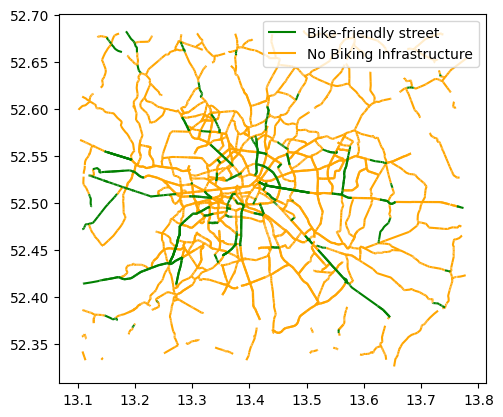

In [8]:
fig, ax = plt.subplots()
sub_gdf = gdf[gdf["highway"].isin(["primary","secondary"])]
sub_gdf[sub_gdf['function'] == "road"].plot(color="green", ax=ax, zorder = 2) 
sub_gdf[sub_gdf['function'].isnull()].plot(color="orange", ax=ax, zorder = 1) 

plt.legend(['Bike-friendly street', 'No Biking Infrastructure'])

plt.show()

In [9]:
gdf[gdf["function"] == "road"]

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location,weight
141,secondary,2.0,yes,60.0,Adlergestell,yes,NaN,good,"LINESTRING (13.62467 52.39004, 13.62481 52.389...",9090039.0,https://www.infravelo.de/projekt/adlergestell/,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,945 m,road,POINT (52.4273954 13.55306775),1.107937
142,primary,3.0,yes,50.0,Adlergestell,yes,B 96a,NaN,"LINESTRING (13.55559 52.42586, 13.55507 52.42621)",9090039.0,https://www.infravelo.de/projekt/adlergestell/,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,945 m,road,POINT (52.4273954 13.55306775),1.163492
143,primary,3.0,NaN,50.0,Adlergestell,yes,B 96a,NaN,"LINESTRING (13.55486 52.42618, 13.55506 52.426...",9090039.0,https://www.infravelo.de/projekt/adlergestell/,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,945 m,road,POINT (52.4273954 13.55306775),1.163492
144,primary,4.0,NaN,50.0,Adlergestell,yes,B 96a,NaN,"LINESTRING (13.55739 52.42446, 13.55752 52.424...",9090039.0,https://www.infravelo.de/projekt/adlergestell/,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,945 m,road,POINT (52.4273954 13.55306775),1.330159
145,primary,1.0,yes,50.0,Adlergestell,yes,NaN,NaN,"LINESTRING (13.54896 52.43012, 13.54915 52.430...",9090039.0,https://www.infravelo.de/projekt/adlergestell/,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,945 m,road,POINT (52.4273954 13.55306775),0.687302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63568,residential,NaN,yes,30,Zingster Straße,NaN,NaN,intermediate,"LINESTRING (13.49526 52.57376, 13.49682 52.57443)",9110079.0,https://www.infravelo.de/projekt/zingster-stra...,Lichtenberg,Baulich getrennter Radweg,Streckenlänge,299 m,road,POINT (52.5656901 13.5007932),0.917460
63569,residential,1.0,yes,30,Zingster Straße,NaN,NaN,intermediate,"LINESTRING (13.49749 52.57383, 13.49806 52.57335)",9110079.0,https://www.infravelo.de/projekt/zingster-stra...,Lichtenberg,Baulich getrennter Radweg,Streckenlänge,299 m,road,POINT (52.5656901 13.5007932),0.750794
63570,tertiary,2.0,yes,30,Zingster Straße,NaN,NaN,NaN,"LINESTRING (13.49692 52.57008, 13.49705 52.569...",9110079.0,https://www.infravelo.de/projekt/zingster-stra...,Lichtenberg,Baulich getrennter Radweg,Streckenlänge,299 m,road,POINT (52.5656901 13.5007932),0.774603
63571,tertiary,2.0,yes,50,Zingster Straße,NaN,NaN,intermediate,"LINESTRING (13.49869 52.56855, 13.49881 52.56844)",9110079.0,https://www.infravelo.de/projekt/zingster-stra...,Lichtenberg,Baulich getrennter Radweg,Streckenlänge,299 m,road,POINT (52.5656901 13.5007932),1.139683


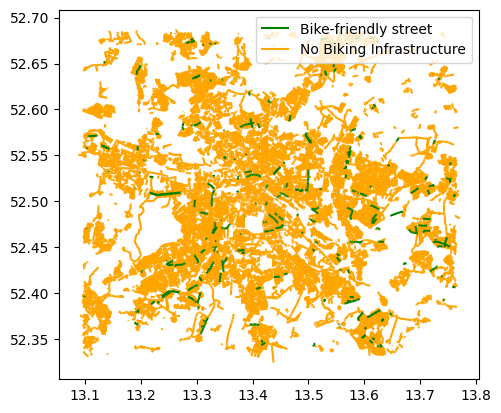

In [10]:
fig, ax = plt.subplots()
sub_gdf = gdf[gdf["highway"].isin(["tertiary","residential"])]
sub_gdf[sub_gdf['function'] == "road"].plot(color="green", ax=ax, zorder = 2) 
sub_gdf[sub_gdf['function'].isnull()].plot(color="orange", ax=ax, zorder = 1) 

plt.legend(['Bike-friendly street', 'No Biking Infrastructure'])

plt.show()

<Axes: >

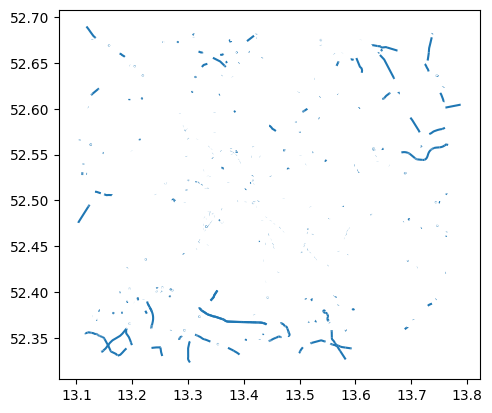

In [11]:
# plot missing streets
streetmiss_df['geometry'] = streetmiss_df['geometry'].apply(loads)
gdf2 = gpd.GeoDataFrame(streetmiss_df, crs='epsg:4326')
gdf2.plot()

<Axes: >

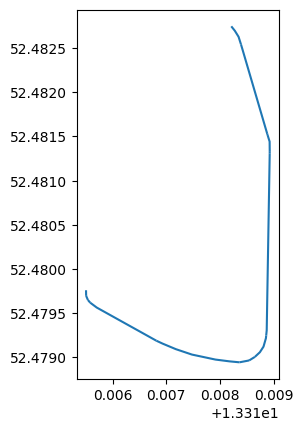

In [12]:
gdf[gdf["streetname"] == "Aachener Straße"].plot()

In [13]:
len(gdf[gdf['streetname'] == "Aachener Straße"])

14

In [14]:
parking_df.head()

,id,title,link,district,type,name,value,function,geometry
0,9100031042,Adorfer Straße 8,https://www.infravelo.de/projekt/adorfer-stras...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,6,parking,POINT (52.5320026 13.6072718)
1,9060111001,Albrechtstraße 49,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,4,parking,POINT (52.4483762 13.3391646)
2,9060092029,Albrechtstraße 81,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,16,parking,POINT (52.4494241 13.3384682)
3,9100031023,Alfred-Döblin-Straße 2 A,https://www.infravelo.de/projekt/alfred-doebli...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (52.5521667 13.5512789)
4,9100031051,Allee der Kosmonauten 79,https://www.infravelo.de/projekt/allee-der-kos...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (52.5279046 13.5460889)


In [15]:
def swap_coordinates(point_str):
  """
  Swaps the order of coordinates in a POINT string.

  Args:
    point_str: A string representing a point in the format "POINT (latitude longitude)".

  Returns:
    A string representing the point with swapped coordinates: "POINT (longitude latitude)".
  """
  try:
    # Extract coordinates from the string
    latlon = point_str.replace("POINT (", "").replace(")", "").split(" ")
    lat = latlon[0]
    lon = latlon[1]
    # Swap coordinates
    swapped_point = f"POINT ({lon} {lat})"
    return swapped_point
  except ValueError:
    print(f"Invalid point string: {point_str}")
    return None

parking_df['geometry'] = parking_df['geometry'].apply(swap_coordinates)
parking_df.head()

,id,title,link,district,type,name,value,function,geometry
0,9100031042,Adorfer Straße 8,https://www.infravelo.de/projekt/adorfer-stras...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,6,parking,POINT (13.6072718 52.5320026)
1,9060111001,Albrechtstraße 49,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,4,parking,POINT (13.3391646 52.4483762)
2,9060092029,Albrechtstraße 81,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,16,parking,POINT (13.3384682 52.4494241)
3,9100031023,Alfred-Döblin-Straße 2 A,https://www.infravelo.de/projekt/alfred-doebli...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (13.5512789 52.5521667)
4,9100031051,Allee der Kosmonauten 79,https://www.infravelo.de/projekt/allee-der-kos...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (13.5460889 52.5279046)


<Axes: >

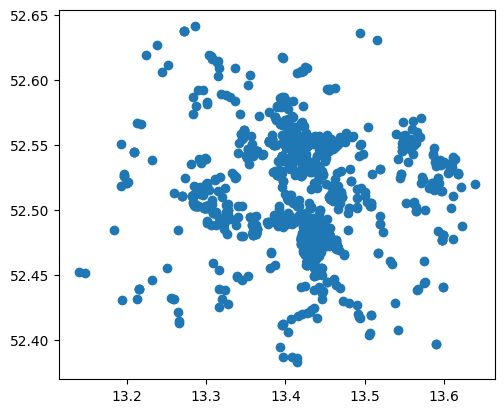

In [16]:
parking_df['geometry'] = parking_df['geometry'].apply(loads)
gdf2 = gpd.GeoDataFrame(parking_df, crs='epsg:4326')
gdf2.plot()

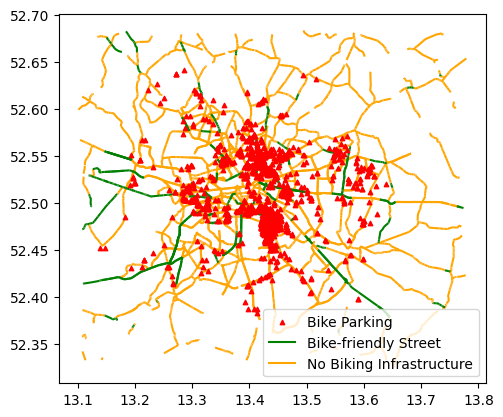

In [17]:
fig, ax = plt.subplots() 
gdf2.plot(ax=ax, color='red', markersize=10, marker='^', zorder = 3) 
sub_gdf = gdf[gdf["highway"].isin(["primary","secondary"])]
sub_gdf[sub_gdf['function'] == "road"].plot(color="green", ax=ax, zorder = 2) 
sub_gdf[sub_gdf['function'].isnull()].plot(color="orange", ax=ax, zorder = 1)

plt.legend(['Bike Parking', 'Bike-friendly Street', 'No Biking Infrastructure'])

plt.show()